# Taitanic 생존 예측

    'titanic.ipynb'

KNN 분류

Logistic회귀 분류

결정 트리 분류

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway,  chi2_contingency
import seaborn as sns
from font import setup_korean_font,get_available_korean_fonts,rebuild_font_cache
import warnings
from IPython import display

warnings.filterwarnings('ignore')


# 환경 설정에 따라서 노란색 줄이 뜰 수 있겠구나 
rebuild_font_cache()
setup_korean_font()
get_available_korean_fonts


❌ 오류: 폰트 캐시 삭제 중 문제가 발생했습니다: module 'matplotlib.font_manager' has no attribute 'get_cachedir'
--- 한글 폰트 설정 시작 ---
운영체제: Darwin
기본 폰트로 'AppleGothic'를 사용합니다.
✅ 성공: 'AppleGothic' 폰트를 설정했습니다.
--- 한글 폰트 설정 종료 ---


<function font.get_available_korean_fonts()>

In [6]:
import sys # 파이썬 인터프리터가 모듈을 찾는 경로를 제어하기 위한 모듈입니다.
import os  # 운영체제와 상호작용하며, 특히 파일/폴더 경로를 다루는 모듈입니다.

# da_utils 폴더의 정확한 절대 경로를 문자열 변수로 저장합니다.
# 이 경로는 스크립트의 위치에 상관없이 고정된 경로를 사용합니다.
da_utils_path = '/Users/jaehyuntak/Desktop/gaida-1st/데이터분석/da_utils'

# sys.path에 da_utils 폴더 경로를 추가합니다.
# 이렇게 하면 파이썬이 모듈을 찾을 때 이 경로를 검색하게 됩니다.
# append() 함수는 리스트의 끝에 요소를 추가합니다.
# import할 모듈 이름과 동일한 이름의 다른 모듈이 이미 sys.path에 있는 경우,
# insert(0, ...)를 사용하면 da_utils 폴더의 모듈을 우선적으로 찾게 할 수 있습니다.
sys.path.append(da_utils_path)

# 이제 da_utils 폴더 내의 모듈들을 불러와 사용할 수 있습니다.
# 예를 들어, 'outliers.py' 파일에 정의된 함수를 사용하려면 다음과 같이 import합니다.
from outliers import outlier_detection
from patterns import analyze_missing_patterns
from profiles import get_data_profile

# 예시 사용
# data = [1, 2, 3, 100, 4, 5]
# cleaned_data = detect_outliers(data)
# print(f"이상치를 제거한 데이터: {cleaned_data}")

# text = "product-123-abc"
# extracted = extract_pattern(text, r'(\d+)')
# print(f"추출된 패턴: {extracted}")

print(f"sys.path에 추가된 경로: {da_utils_path}")
print("이제 'da_utils' 폴더 내의 모듈을 어디서든 불러와 사용할 수 있습니다.")

sys.path에 추가된 경로: /Users/jaehyuntak/Desktop/gaida-1st/데이터분석/da_utils
이제 'da_utils' 폴더 내의 모듈을 어디서든 불러와 사용할 수 있습니다.


타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

,결측수,결측률(%)
deck,688,77.22
age,177,19.87
embarked,2,0.22
embark_town,2,0.22


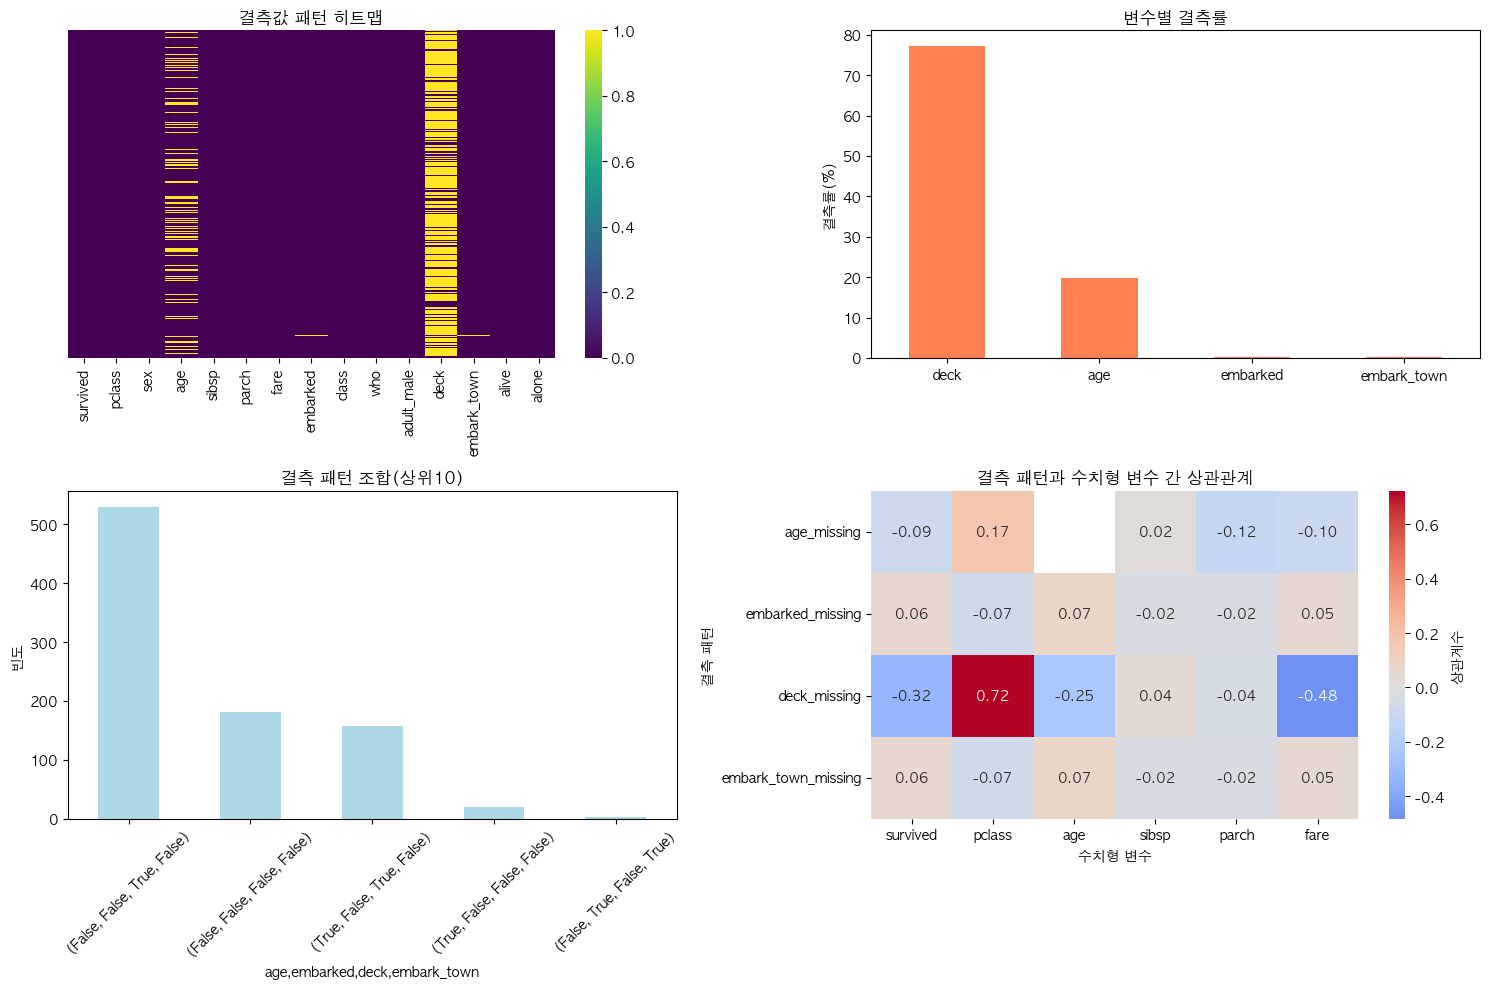

             결측수  결측률(%)
deck         688   77.22
age          177   19.87
embarked       2    0.22
embark_town    2    0.22

종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 891행 x 15열
- 메모리 사용량: 0.31mb
- 수치형 변수: 6 개
- 범주형 변수: 5 개

2. 결측값 분석
⚠️


,결측수,결측율(%)
age,177,19.87
embarked,2,0.22
deck,688,77.22
embark_town,2,0.22



3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,survived,0.384,0.487,0.00,1.000,0.479,-1.775,0.000,0.224
1,pclass,2.309,0.836,1.00,3.000,-0.631,-1.280,0.000,0.337
2,age,29.699,14.526,0.42,80.000,0.389,0.178,1.541,12.325
3,sibsp,0.523,1.103,0.00,8.000,3.695,17.880,5.163,0.786
4,parch,0.382,0.806,0.00,6.000,2.749,9.778,23.906,0.786
5,fare,32.204,49.693,0.00,512.329,4.787,33.398,13.019,27.834



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- sibsp: 왜도 = 3.695
-- parch: 왜도 = 2.749
-- fare: 왜도 = 4.787

- 높은 이상값 비율(>5%)
⚠️
-- sibsp: 이상값 5.2%
-- parch: 이상값 23.9%
-- fare: 이상값 13.0%
        변수명      평균    표준편차   최솟값      최댓값     왜도      첨도  이상값비율(%)  유일값비율(%)
0  survived   0.384   0.487  0.00    1.000  0.479  -1.775     0.000     0.224
1    pclass   2.309   0.836  1.00    3.000 -0.631  -1.280     0.000     0.337
2       age  29.699  14.526  0.42   80.000  0.389   0.178     1.541    12.325
3     sibsp   0.523   1.103  0.00    8.000  3.695  17.880     5.163     0.786
4     parch   0.382   0.806  0.00    6.000  2.749   9.778    23.906     0.786
5      fare  32.204  49.693  0.00  512.329  4.787  33.398    13.019    27.834


In [11]:
# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

print(analyze_missing_patterns(titanic))
print( )
print(get_data_profile(titanic))





In [22]:
titanic_numeric = titanic.select_dtypes(include=['number']).columns

print(titanic_numeric)
print(titanic[titanic_numeric].corr())

# print(titanic[titanic_numeric].corr().to_json)

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [21]:
titanic_object = titanic.select_dtypes(include=['object']).columns

titanic_object

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

=== ANOVA: 범주형(sex) vs. 수치형(fare) 분석 ===
F-통계량: 30.5714, p-값: 0.0000
결론: p-값이 유의미(0.05 미만)하므로, 성별에 따른 운임(fare) 평균에 통계적으로 유의미한 차이가 있습니다.

=== ANOVA: 범주형(pclass) vs. 수치형(age) 분석 ===
F-통계량: nan, p-값: nan
결론: p-값이 유의미하지 않으므로, 좌석 등급에 따른 나이(age) 평균 차이는 통계적으로 유의미하지 않습니다.

=== 카이제곱 검정: 범주형(sex) vs. 범주형(survived) 분석 ===
교차표:


survived,0,1
sex,,
female,81,233
male,468,109



카이제곱 통계량: 260.7170, p-값: 0.0000
결론: p-값이 유의미(0.05 미만)하므로, 성별과 생존 여부 간에 통계적으로 유의미한 관계가 있습니다.

=== 상관관계 히트맵 시각화 ===


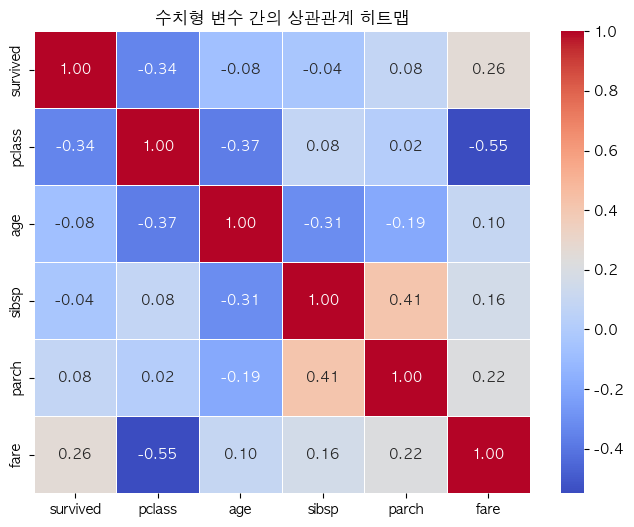


=== 성별 및 좌석 등급에 따른 운임(fare) 평균 히트맵 ===


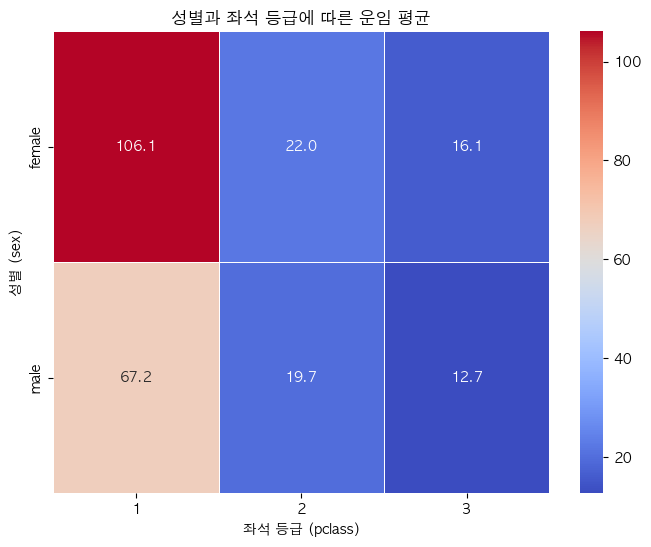


=== 생존 여부에 따른 범주형 변수 관계 히트맵 ===


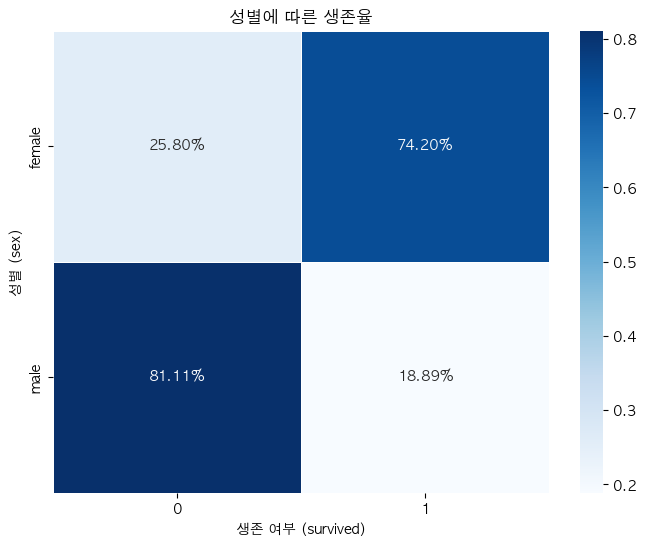

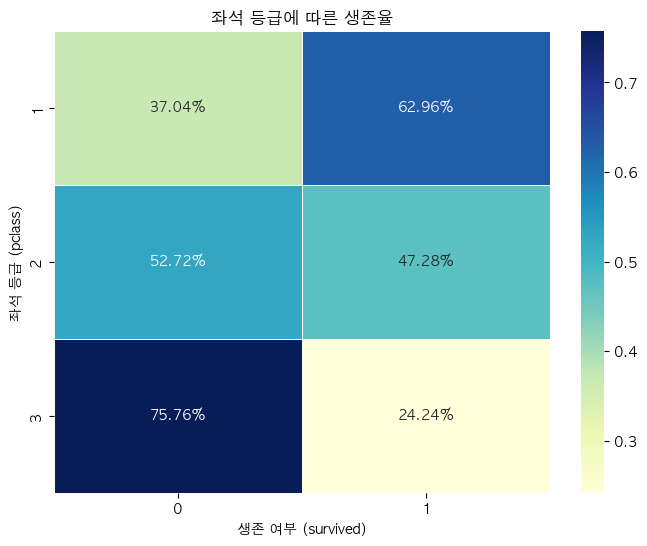

In [27]:
# === 1. ANOVA: 범주형 vs. 수치형 변수 분석 ===
print("=== ANOVA: 범주형(sex) vs. 수치형(fare) 분석 ===")
# 'sex' 변수의 각 그룹별로 'fare' 데이터를 추출
fare_male = titanic[titanic['sex'] == 'male']['fare']
fare_female = titanic[titanic['sex'] == 'female']['fare']

# ANOVA 실행
f_stat, p_val = f_oneway(fare_male, fare_female)
print(f"F-통계량: {f_stat:.4f}, p-값: {p_val:.4f}")
if p_val < 0.05:
    print("결론: p-값이 유의미(0.05 미만)하므로, 성별에 따른 운임(fare) 평균에 통계적으로 유의미한 차이가 있습니다.\n")
else:
    print("결론: p-값이 유의미하지 않으므로, 성별에 따른 운임(fare) 평균 차이는 통계적으로 유의미하지 않습니다.\n")

print("=== ANOVA: 범주형(pclass) vs. 수치형(age) 분석 ===")
# 'pclass' 변수의 각 그룹별로 'age' 데이터를 추출
age_class1 = titanic[titanic['pclass'] == 1]['age']
age_class2 = titanic[titanic['pclass'] == 2]['age']
age_class3 = titanic[titanic['pclass'] == 3]['age']

# ANOVA 실행
f_stat_pclass, p_val_pclass = f_oneway(age_class1, age_class2, age_class3)
print(f"F-통계량: {f_stat_pclass:.4f}, p-값: {p_val_pclass:.4f}")
if p_val_pclass < 0.05:
    print("결론: p-값이 유의미(0.05 미만)하므로, 좌석 등급에 따른 나이(age) 평균에 통계적으로 유의미한 차이가 있습니다.\n")
else:
    print("결론: p-값이 유의미하지 않으므로, 좌석 등급에 따른 나이(age) 평균 차이는 통계적으로 유의미하지 않습니다.\n")


# === 2. 카이제곱 검정: 범주형 vs. 범주형 변수 분석 ===
print("=== 카이제곱 검정: 범주형(sex) vs. 범주형(survived) 분석 ===")
# 교차표(contingency table) 생성
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])
print("교차표:")
display(contingency_table)

# 카이제곱 검정 실행
# scipy.stats.chi2_contingency: 두 범주형 변수 간의 독립성 검정을 수행합니다.
# 이 함수는 관측 빈도(contingency table)를 기반으로 카이제곱 통계량, p-값, 자유도 등을 반환합니다.
# p-값이 0.05보다 작으면 두 변수 간에 유의미한 관계가 있다고 판단합니다.
chi2, p_val_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"\n카이제곱 통계량: {chi2:.4f}, p-값: {p_val_chi2:.4f}")

if p_val_chi2 < 0.05:
    print("결론: p-값이 유의미(0.05 미만)하므로, 성별과 생존 여부 간에 통계적으로 유의미한 관계가 있습니다.")
else:
    print("결론: p-값이 유의미하지 않으므로, 성별과 생존 여부 간에 관계가 없다고 볼 수 있습니다.")



# === 3. 상관관계 히트맵 시각화 ===
print("\n=== 상관관계 히트맵 시각화 ===")
# 상관관계 행렬 계산
corr_matrix = titanic[titanic_numeric].corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5)
plt.title('수치형 변수 간의 상관관계 히트맵')
plt.show()


# === 4. 범주형 vs. 수치형 히트맵 (피벗 테이블 이용) ===
print("\n=== 성별 및 좌석 등급에 따른 운임(fare) 평균 히트맵 ===")

# 'sex'와 'pclass'에 따른 'fare'의 평균을 계산하는 피벗 테이블 생성
# values: 집계할 값, index: 행, columns: 열, aggfunc: 집계 함수
fare_pivot = titanic.pivot_table(values='fare', index='sex', columns='pclass', aggfunc='mean')

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(fare_pivot, annot=True, cmap='coolwarm', fmt=".1f",
            linewidths=.5)
plt.title('성별과 좌석 등급에 따른 운임 평균')
plt.xlabel('좌석 등급 (pclass)')
plt.ylabel('성별 (sex)')
plt.show()

# === 5. 생존 여부(survived)를 중심으로 한 히트맵 시각화 ===
print("\n=== 생존 여부에 따른 범주형 변수 관계 히트맵 ===")

# 범주형 변수 'sex'와 'survived'의 빈도수를 계산하는 교차표 생성
survived_sex_counts = pd.crosstab(titanic['sex'], titanic['survived'], normalize='index')

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(survived_sex_counts, annot=True, fmt=".2%", cmap="Blues",
            linewidths=.5)
plt.title('성별에 따른 생존율')
plt.xlabel('생존 여부 (survived)')
plt.ylabel('성별 (sex)')
plt.show()

# 'pclass'와 'survived'의 빈도수를 계산하는 교차표 생성
survived_pclass_counts = pd.crosstab(titanic['pclass'], titanic['survived'], normalize='index')

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(survived_pclass_counts, annot=True, fmt=".2%", cmap="YlGnBu",
            linewidths=.5)
plt.title('좌석 등급에 따른 생존율')
plt.xlabel('생존 여부 (survived)')
plt.ylabel('좌석 등급 (pclass)')
plt.show()


In [31]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'adult_male', 'deck', 'alone'],
      dtype='object')

In [32]:
# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame variable name

# List of columns to drop
# 'alive' is a duplicate of 'survived'
# 'who' can be inferred from 'sex' and 'age'
# 'embark_town' is similar to 'embarked'
columns_to_drop = ['alive', 'who', 'embark_town']

# Drop the columns from the DataFrame
# The 'axis=1' argument specifies that we are dropping columns, not rows
# 'inplace=True' modifies the DataFrame directly without needing to assign it to a new variable
titanic.drop(columns=columns_to_drop, axis=1, inplace=False)

# Print the remaining columns to verify
print("Columns remaining in the DataFrame:")
print(titanic.columns)

KeyError: "['alive', 'who', 'embark_town'] not found in axis"

In [ ]:
from sklearn.exceptions